<a href="https://colab.research.google.com/github/AsmitaGhoderao/Exploratory-Data-Analysis-Projects/blob/master/Churn%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np

import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import Row
import seaborn as sns
from pyspark import SparkContext
from pyspark import SQLContext

# Spark Configuration

In [3]:
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark.conf.set("Spark.sql.repl.eagerEval.enabled", True)

# Import CHURN Dataset

In [8]:
df = spark.read.csv('/content/Churn.csv', inferSchema = True, header = True)

In [9]:
df.show()

+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VMailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|
|          107|          26|  161.6|  195.5|    254.4|    13.7|            1|    0|       0|        1|     123|    27.47|     103|    16.62|       103|      11.45| 

In [10]:
df.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: integer (nullable = true)
 |-- IntlPlan: integer (nullable = true)
 |-- VMailPlan: integer (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



# Data Pre-Processing

In [11]:
from pyspark.sql.functions import *

df = df.withColumn("Churn",col("Churn").cast(StringType())) \
.withColumn("IntlPlan",col("IntlPlan").cast(StringType())) \
.withColumn("VmailPlan",col("VmailPlan").cast(StringType()))

In [12]:
df.printSchema()

root
 |-- AccountLength: integer (nullable = true)
 |-- VMailMessage: integer (nullable = true)
 |-- DayMins: double (nullable = true)
 |-- EveMins: double (nullable = true)
 |-- NightMins: double (nullable = true)
 |-- IntlMins: double (nullable = true)
 |-- CustServCalls: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- IntlPlan: string (nullable = true)
 |-- VmailPlan: string (nullable = true)
 |-- DayCalls: integer (nullable = true)
 |-- DayCharge: double (nullable = true)
 |-- EveCalls: integer (nullable = true)
 |-- EveCharge: double (nullable = true)
 |-- NightCalls: integer (nullable = true)
 |-- NightCharge: double (nullable = true)
 |-- IntlCalls: integer (nullable = true)
 |-- IntlCharge: double (nullable = true)
 |-- State: string (nullable = true)
 |-- AreaCode: integer (nullable = true)
 |-- Phone: string (nullable = true)



In [13]:
df.summary().show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----+------------------+--------+
|summary|     AccountLength|      VMailMessage|           DayMins|           EveMins|         NightMins|          IntlMins|     CustServCalls|              Churn|          IntlPlan|          VmailPlan|          DayCalls|         DayCharge|          EveCalls|         EveCharge|        NightCalls|      NightCharge|         IntlCalls|        IntlCharge|State|          AreaCode|   Phone|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+------------------+-------------------+------------------+------

In [ ]:
df.select('Churn','IntlPlan','VMailPlan').summary().show()

+-------+-------------------+------------------+-------------------+
|summary|              Churn|          IntlPlan|          VMailPlan|
+-------+-------------------+------------------+-------------------+
|  count|               3333|              3333|               3333|
|   mean|0.14491449144914492|0.0969096909690969|0.27662766276627665|
| stddev|  0.352067423624126|0.2958791454844147| 0.4473978703800645|
|    min|                  0|                 0|                  0|
|    25%|                0.0|               0.0|                0.0|
|    50%|                0.0|               0.0|                0.0|
|    75%|                0.0|               0.0|                1.0|
|    max|                  1|                 1|                  1|
+-------+-------------------+------------------+-------------------+



In [ ]:
df.show()

+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|AccountLength|VMailMessage|DayMins|EveMins|NightMins|IntlMins|CustServCalls|Churn|IntlPlan|VmailPlan|DayCalls|DayCharge|EveCalls|EveCharge|NightCalls|NightCharge|IntlCalls|IntlCharge|State|AreaCode|   Phone|
+-------------+------------+-------+-------+---------+--------+-------------+-----+--------+---------+--------+---------+--------+---------+----------+-----------+---------+----------+-----+--------+--------+
|          128|          25|  265.1|  197.4|    244.7|    10.0|            1|    0|       0|        1|     110|    45.07|      99|    16.78|        91|      11.01|        3|       2.7|   KS|     415|382-4657|
|          107|          26|  161.6|  195.5|    254.4|    13.7|            1|    0|       0|        1|     123|    27.47|     103|    16.62|       103|      11.45| 

# Exploratory Data Analysis

In [14]:
df1 = df.toPandas()
df1.head()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntlPlan,VmailPlan,...,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


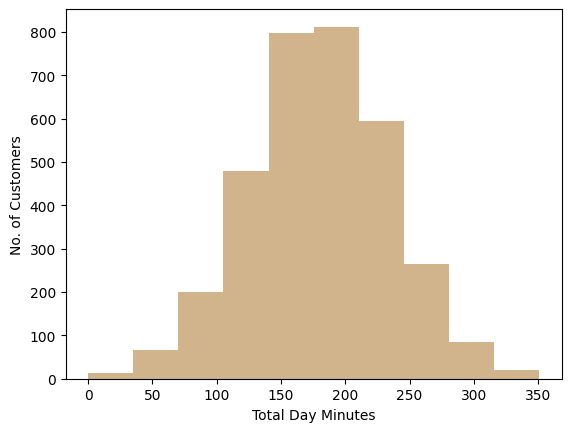

In [15]:
plt.hist(df1['DayMins'], bins= 10, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

In [19]:
##The above graph, shows that the highest time spent is 170 to 200 mins by almost 800 customers during their service period

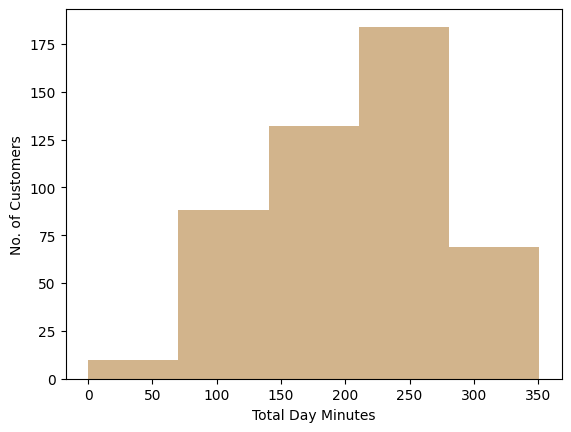

In [26]:
st = df1[df1['Churn']=='1']['DayMins']
plt.hist(st, bins= 5, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

In [27]:
##

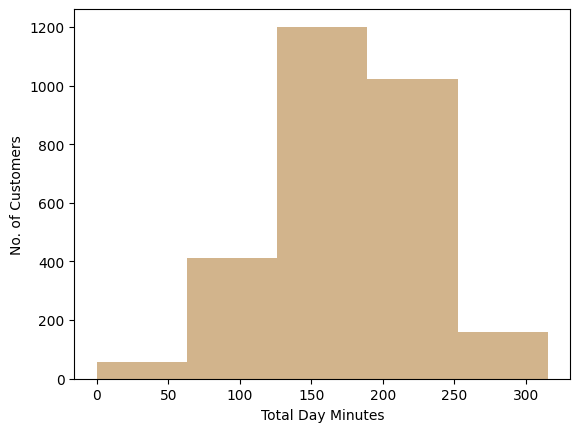

In [28]:
st = df1[df1['Churn']=='0']['DayMins']
plt.hist(st, bins= 5, facecolor= 'tan')
plt.xlabel('Total Day Minutes')
plt.ylabel('No. of Customers')
plt.show()

In [31]:
## Numbe of customers opting for voice mailplan
df1['VmailPlan'].value_counts()

0    2411
1     922
Name: VmailPlan, dtype: int64

In [33]:
df1['VmailPlan'].value_counts(normalize = True)

0    0.723372
1    0.276628
Name: VmailPlan, dtype: float64

In [34]:
## 72% of customers do not opt for voice mail plan

<Axes: xlabel='VmailPlan', ylabel='count'>

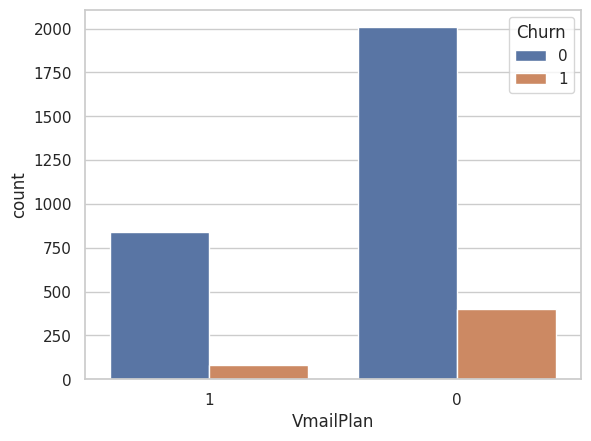

In [35]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="VmailPlan", hue= "Churn", data=df1)

In [36]:
## number of customers who don't opt for voice mail plan are tend to Churn

In [37]:
## International Plan opt by cutomer
df1['IntlPlan'].value_counts(normalize = True)

0    0.90309
1    0.09691
Name: IntlPlan, dtype: float64

<Axes: xlabel='IntlPlan', ylabel='count'>

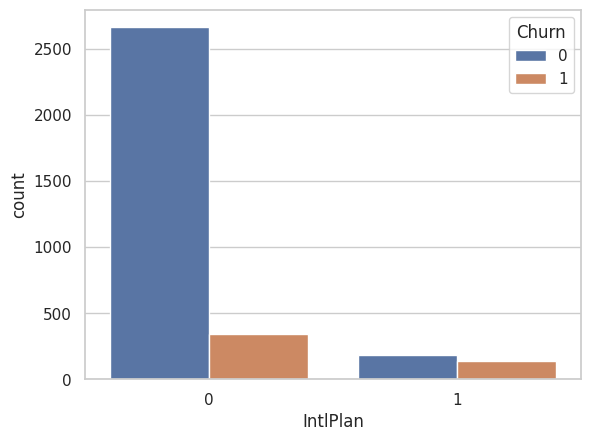

In [38]:
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="IntlPlan", hue= "Churn", data=df1)

In [39]:
## Very less customers opt for international plan and have high Churn probability due to high charges on this particular plan

<Axes: xlabel='AreaCode', ylabel='count'>

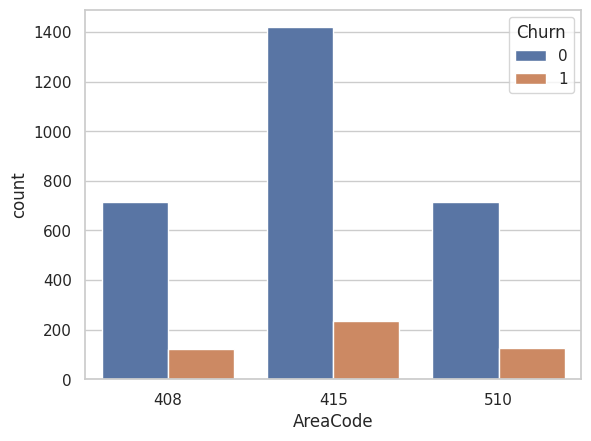

In [41]:
## Areawise analysis

df1['AreaCode']= df1['AreaCode'].astype('category')
sns.countplot(x="AreaCode", hue= "Churn", data=df1)

In [42]:
df1.corr('pearson')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge
AccountLength,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
VMailMessage,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
DayMins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
EveMins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
NightMins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
IntlMins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServCalls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
DayCalls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
DayCharge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
EveCalls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


In [47]:
## Correlation between the Target variable 'Churn' and other variables
df1['Churn']= df1['Churn'].astype('int')
df1.corr()['Churn']

AccountLength    0.016541
VMailMessage    -0.089728
DayMins          0.205151
EveMins          0.092796
NightMins        0.035493
IntlMins         0.068239
CustServCalls    0.208750
Churn            1.000000
DayCalls         0.018459
DayCharge        0.205151
EveCalls         0.009233
EveCharge        0.092786
NightCalls       0.006141
NightCharge      0.035496
IntlCalls       -0.052844
IntlCharge       0.068259
Name: Churn, dtype: float64

In [48]:
## From the obtained table, we find that Day minutes, Customer Serv Calls, Intl Plan has weak positive correlation with predicting variable Churn,
## while VMail Message, VMail Plan and Intl Calls has weak negative correlation. While remaining variables has either weak positive or negative correlation.
